<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entender el problema**

Un modelo de respuesta puede dar un impulso significativo a la eficacia de una campaña de marketing aumentando las respuestas o reduciendo los gastos. El objetivo fundamental es predecir quién responderá a una oferta de un producto o servicio,


# **Datos** 

Podemos acceder a estos datos desde el repositorio Kaggle: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign.

# **Información de las variables de interés**:

Toda las variables son categóricas.

- AcceptedCmp1 - 1 si el cliente aceptó la oferta en la 1ra campaña, 0 de lo contrario
- AcceptedCmp2 - 1 si el cliente aceptó la oferta en la 2da campaña, 0 de lo contrario
- AcceptedCmp3 - 1 si el cliente aceptó la oferta en la 3ra campaña, 0 de lo contrario
- AcceptedCmp4 - 1 si el cliente aceptó la oferta en la 4ta campaña, 0 de lo contrario
- AcceptedCmp5 - 1 si el cliente aceptó la oferta en la 5ta campaña, 0 de lo contrario
- Response (target) - 1 si el cliente aceptó la oferta en la última campaña, 0 de lo contrario
- Complain - 1 si el cliente se quejó en los últimos 2 años
- DtCustomer - fecha de inscripción del cliente con la empresa
- Education - nivel de educación del cliente
- Marital - estado civil del cliente
- Kidhome - número de niños pequeños en el hogar del cliente
- Teenhome - número de adolescentes en el hogar del cliente
- Income - ingreso anual del hogar del cliente
- MntFishProducts - cantidad gastada en productos de pescado en los últimos 2 años
- MntMeatProducts - cantidad gastada en productos de carne en los últimos 2 años
- MntFruits - cantidad gastada en productos de frutas en los últimos 2 años
- MntSweetProducts - cantidad gastada en productos dulces en los últimos 2 años
- MntWines - cantidad gastada en productos de vino en los últimos 2 años
- MntGoldProds - cantidad gastada en productos de oro en los últimos 2 años
- NumDealsPurchases - número de compras realizadas con descuento
- NumCatalogPurchases -  número de compras realizadas utilizando catálogo
- NumStorePurchases - número de compras realizadas directamente en tiendas
- NumWebPurchases - número de compras realizadas a través del sitio web de la empresa
- NumWebVisitsMonth - número de visitas al sitio web de la empresa en el último mes
- Recency - número de días desde la última compra.




# **Obtención y comprensión de datos**

En primer lugar cargamos algunas librerías necesarias para el análisis de datos. 

A continuación leemos los datos.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [5]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/URJCDSLab/Short_Courses/main/Clustering/code/marketing_campaign.csv',sep=";")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **Análisis Exploratorio**


Sería necesario un EDA completo. Aquí presentamos una versión simplificada.

In [8]:
df.shape

(2240, 29)

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#**Limpieza y Depuración de datos**

Chequeamos la existencia de valores faltantes.

In [12]:
df.isnull().sum()*100/df.shape[0]

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [13]:
df= df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


Podemos decir que los datos están limpios puesto que hemos eliminado las filas con valores faltantes.


## **Ingeniería de Características**

Creamos una nueva variable a partir de "Dt_customer" que indique el número de días que un cliente lleva registrado en la base de datos de la empresa. Para simplificar, tomamos ese valor en relación con el cliente más reciente del registro.

Por lo tanto, para obtener los valores comprobamos las fechas de registro más reciente y más antigua.

Creación de una variable o característica nueva, que denominaremos  "Customer_For" y que recoge el número de días que los clientes empezaron a comprar en la tienda en relación con la última fecha registrada.

In [14]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("La fecha de inscripción del cliente más reciente en los registros:",max(dates))
print("La fecha de inscripción más antigua del cliente en los registros:",min(dates))

La fecha de inscripción del cliente más reciente en los registros: 2014-06-29
La fecha de inscripción más antigua del cliente en los registros: 2012-07-30


In [15]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

Ahora exploraremos los valores únicos de las características categóricas para hacernos una idea clara de los datos.

In [16]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


A continuación, se realizan las siguientes transformaciones sobre los datos originales:

- Extraer la "Age" de un cliente a partir del "Year_Birth" indicando el año de nacimiento de la persona respectiva.
- Crear otra característica "Spent" que indique la cantidad total gastada por el cliente en varias categorías en un periodo de dos años.
- Crear otra característica "Living_With" a partir de "Marital_Status" para extraer la situación de vida de las parejas.
- Crear una función "Children" para indicar el total de hijos de un hogar, es decir, niños y adolescentes.
- Para obtener un mayor conocimiento del hogar, crear una característica que indique "Family_Size".
- Crear una característica "Is_Parent" para indicar la situación de paternidad
- Crear tres categorías en "Education".
- Eliminar las características redundantes.

In [18]:
# Ingeniería de Características
# Edad del cliente
df["Age"] = 2021-df["Year_Birth"]

# Gastos totales en varias características
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Situación de vida a partir del estado matrimonial
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Número total de niños y adolescentes en la casa
df["Children"]=df["Kidhome"]+df["Teenhome"]

# Número de personas en la familia
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

# Paternidad 
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

# Segmentando la educacuón en grupos
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Renombramos variables para un mejor entendimiento
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Eliminamos variables redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [19]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


Las estadísticas anteriores muestran algunas discrepancias en el ingreso medio y la edad y el ingreso máximo y la edad.

Por ejemplo, la edad máxima es de 128 años!!.


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

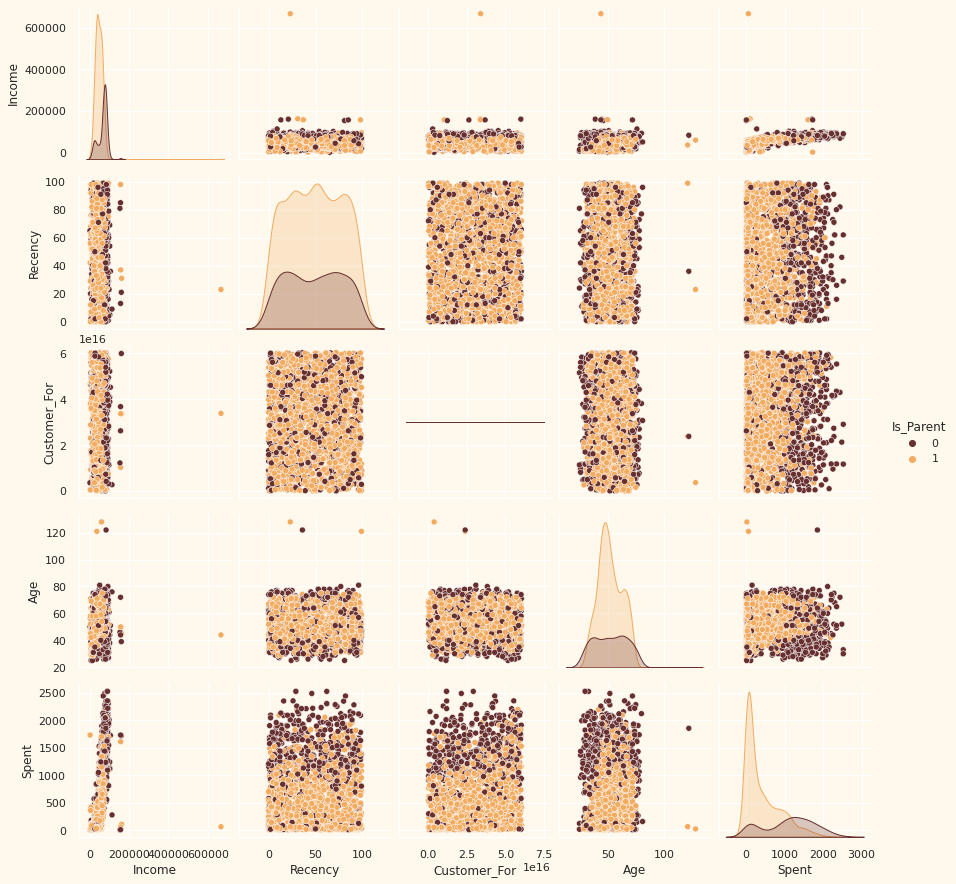

In [20]:
# Visualizamos algunas características 
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

Detectamos algunos valores atípicos en las variables Income y Age. Los eliminamos.

In [22]:
# Eliminamos valores atípicos
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Número de observaciones después de eliminar valores falantes:", len(df))

Número de observaciones después de eliminar valores falantes: 2212


## **Preprocesado de los datos**

En esta sección, vamos a preparar los datos para aplicar posteriormente el análisis no supervisado.

Para preprocesar los datos se aplican los siguientes pasos:

- Codificación de etiquetas de las características categóricas.
- Escalado de las características para que tengan valores comparables.
- Creación de un data frame para reducir la dimensionalidad.

In [23]:
# Lista de variables categóricas
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Variables categóricas en la base de datos:", object_cols)

Variables categóricas en la base de datos: ['Education', 'Living_With']


In [24]:
# Codificación
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("Ahora todas las variables son numéricas")

Ahora todas las variables son numéricas


In [25]:
# Creamos una copia de los datos
df_copy = df.copy()
# Crear un subconjunto de datos eliminando las características de las ofertas aceptadas y las promociones
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df_copy = df_copy.drop(cols_del, axis=1)
# Escalado
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df_copy = pd.DataFrame(scaler.transform(df_copy),columns= df_copy.columns )
print("Ahora todas las variables están escaladas")

Ahora todas las variables están escaladas


In [26]:
# Escalamos los datos para la reducción de la dimensión
print("Data frame para el modelado:")
scaled_df_copy.head()

Data frame para el modelado:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# **Reducción de la dimensión**

En este problema, hay muchas variables en función de los cuales se hará la clasificación final. Cuanto mayor sea el número de características, más difícil será trabajar con ellas. Muchas de estas características están correlacionadas y, por tanto, son redundantes. Por este motivo, se realiza una reducción de la dimensionalidad de las características seleccionadas antes de someterlas a un clasificador.

La reducción de la dimensionalidad consiste en reducir el número de variables aleatorias consideradas, obteniendo un conjunto de variables principales que son combinaciones lineales e independientes de las variables originales.

In [27]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df_copy)
PCA_df = pd.DataFrame(pca.transform(scaled_df_copy), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.212219e-17,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,4.497106e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,4.497106e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


<Figure size 576x396 with 0 Axes>

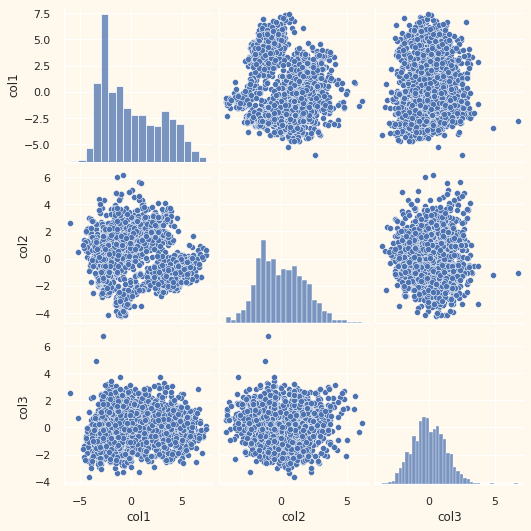

In [48]:
plt.figure()
sns.pairplot(PCA_df)
 
plt.show()

# **Modelización. Clustering**

Ahora que hemos reducido los atributos a tres dimensiones, realizamos la agrupación mediante la agrupación aglomerativa. El clustering aglomerativo es un método de clustering jerárquico. Consiste en fusionar ejemplos hasta alcanzar el número de clusters deseado.

Seguiremos los siguientes pasos:

- Método del codo para determinar el número de grupos que deben formarse
- Agrupación mediante Clustering Aglomerativo
- Examen de los grupos formados mediante gráfico de dispersión

Método del codo para determinar el número de conglomerados que deben formarse:


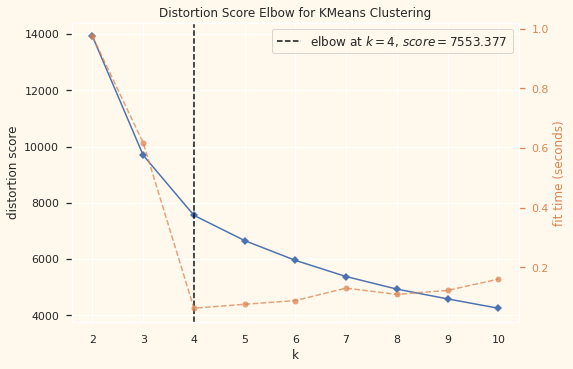

In [49]:
print('Método del codo para determinar el número de conglomerados que deben formarse:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()


La celda anterior indica que cuatro será un número óptimo de conglomerados para estos datos. A continuación, ajustaremos el modelo de agrupación aglomerativa para obtener los conglomerados finales.

In [50]:

AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
# Añadimos los clusters al Data Frame original.
df["Clusters"]= yhat_AC

# **Visualización e Interpretación**

Para examinar los clusters formados, representamos las tres primeras componentes principales junto con los nuevos grupos.

<Figure size 576x396 with 0 Axes>

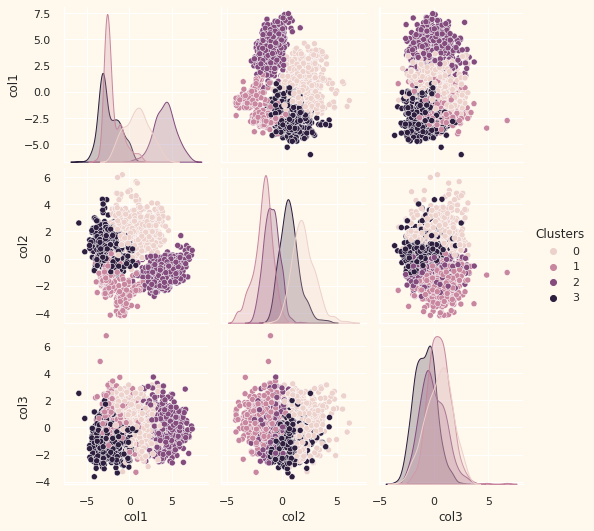

In [53]:

plt.figure()
sns.pairplot(PCA_df,hue="Clusters")
 plt.show()

Dado que se trata de una agrupación no supervisada, no disponemos de una etiqueta de clase para evaluar o puntuar nuestro modelo. El propósito de esta sección es estudiar los patrones en los clusters formados y determinar la naturaleza de los patrones de los clusters.

Para ello, examinaremos los datos a la luz de los conglomerados mediante el análisis exploratorio de datos y extraeremos conclusiones.

En primer lugar, veamos la distribución por grupos de la agrupación

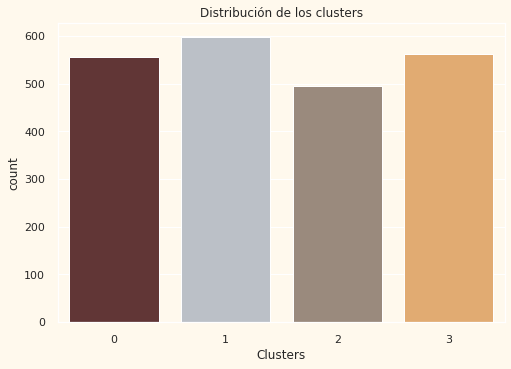

In [54]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribución de los clusters")
plt.show()

La distribución de las observaciones en los clusters es bastante homogénea.

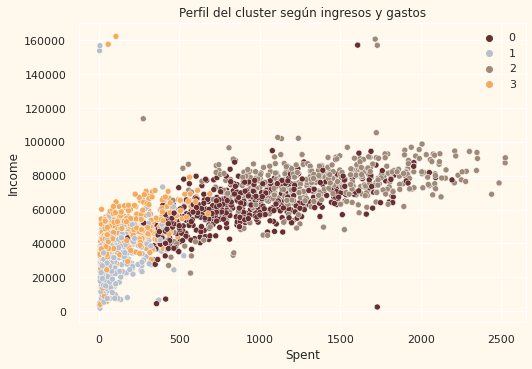

In [55]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Perfil del cluster según ingresos y gastos")
plt.legend()
plt.show()

El gráfico de ingresos frente a gastos muestra el patrón de agrupaciones

- grupo 0: gasto elevado e ingresos medios
- grupo 1: gasto bajo y renta baja
- grupo 2: gasto elevado e ingresos elevados
- grupo 3: gasto elevado e ingresos bajos

A continuación, examinaré la distribución detallada de los conglomerados según los distintos productos de los datos. A saber: Vinos, Frutas, Carne, Pescado, Dulces y Oro.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


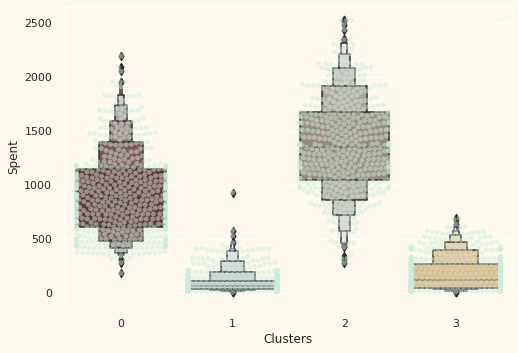

In [56]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

Del gráfico anterior se desprende claramente que el clúster 2 es nuestro mayor conjunto de clientes, seguido de cerca por el clúster 0. Podemos explorar en qué gasta cada clúster para las estrategias de marketing dirigidas.

Veamos cómo han funcionado nuestras campañas en el pasado.

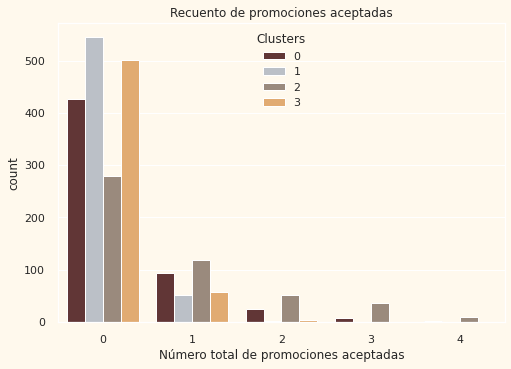

In [57]:
#Crear una función para obtener una suma de promociones aceptadas 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Gráfica del recuento total de campañas aceptadas.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette=pal)
pl.set_title("Recuento de promociones aceptadas")
pl.set_xlabel("Número total de promociones aceptadas")
plt.show()

Hasta ahora no ha habido una respuesta abrumadora a las campañas. Muy pocos participantes en general. Además, nadie participa en las cinco. Quizá se necesiten campañas mejor orientadas y bien planificadas para impulsar las ventas.


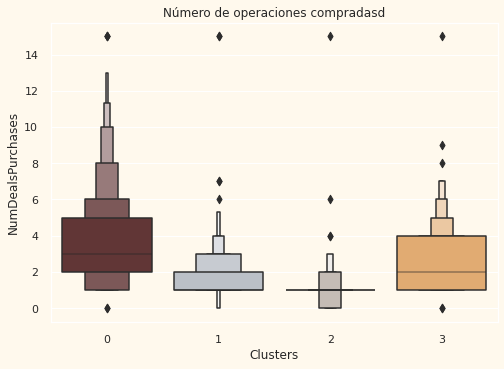

In [58]:
# Número de operaciones compradas

plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Número de operaciones compradas")
plt.show()

A diferencia de las campañas, las ofertas ofrecidas dieron buenos resultados. Los mejores resultados se obtienen en los grupos 0 y 3. Sin embargo, nuestros clientes estrella del clúster 2 no están muy interesados en las ofertas. Nada parece atraer de forma abrumadora al clúster 1.


# **Perfilado**

Ahora que ya hemos formado los grupos y analizado sus hábitos de compra, veamos quiénes forman parte de estos grupos. Para ello, haremos un perfil de los clusters formados y llegaremos a una conclusión sobre **quién es nuestro cliente estrella** y **quién necesita más atención por parte del equipo de marketing de la tienda**.

Para ello, estudiaremos algunas de las características indicativas de los rasgos personales del cliente en función del cluster en el que se encuentre. A partir de los resultados, obtendremos conclusiones.

<Figure size 576x396 with 0 Axes>

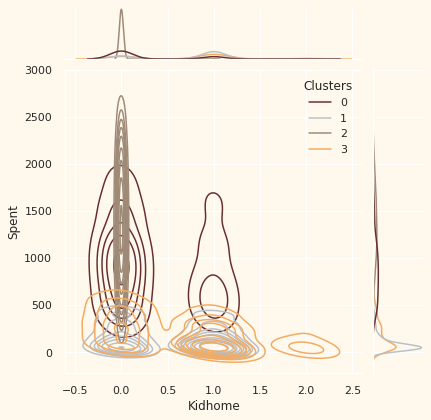

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

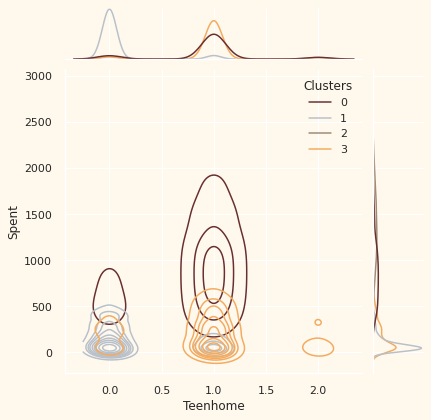

<Figure size 576x396 with 0 Axes>

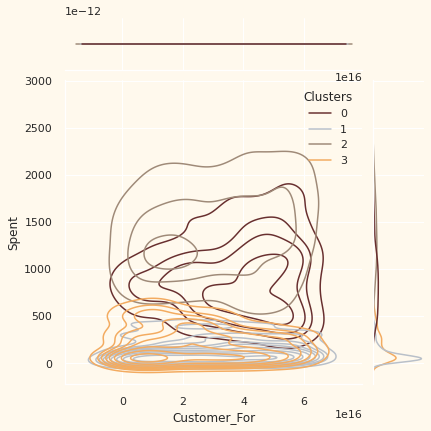

<Figure size 576x396 with 0 Axes>

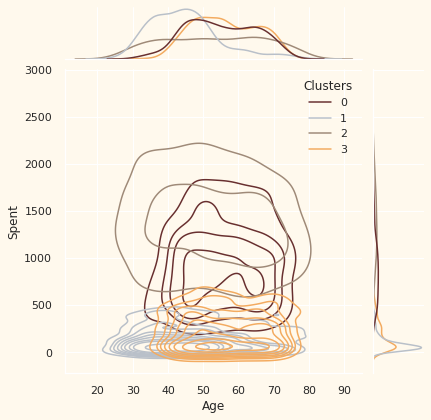

<Figure size 576x396 with 0 Axes>

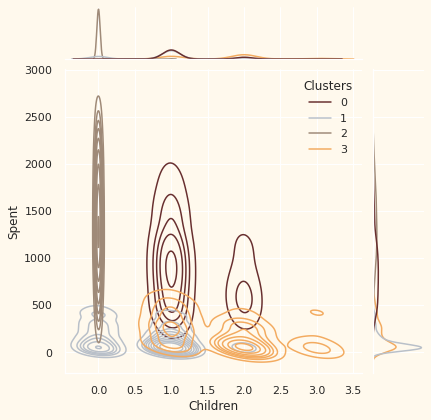

<Figure size 576x396 with 0 Axes>

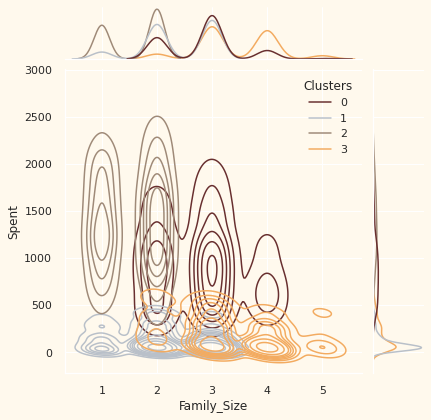

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

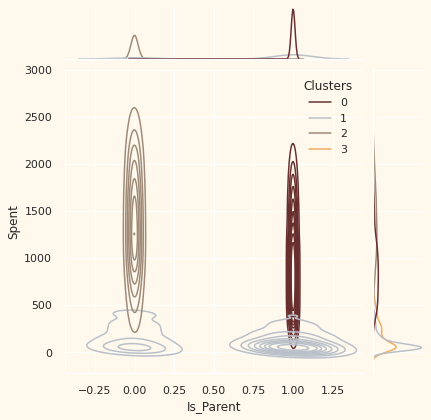

<Figure size 576x396 with 0 Axes>

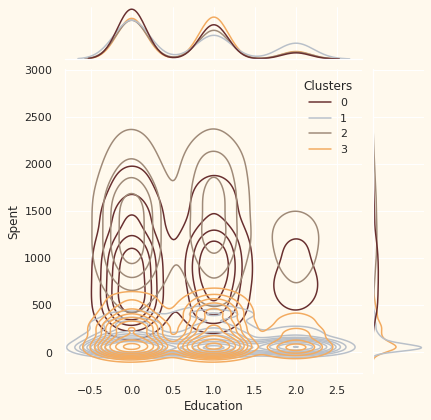

<Figure size 576x396 with 0 Axes>

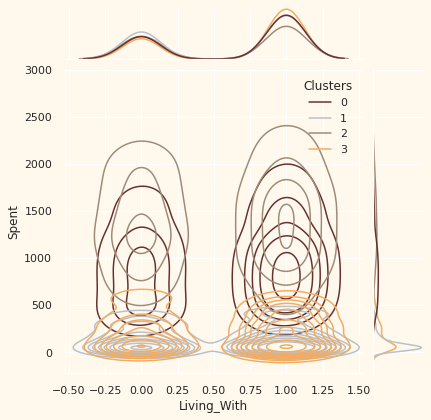

In [59]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

Se puede deducir la siguiente información sobre los clientes de las distintas agrupaciones:

**Cluster 0**

- Padre o madre
- Familia de mínimo 2 y máximo 4 miembros
- Las familias monoparentales son un subconjunto de este grupo
- La mayoría tiene un adolescente en casa 
- Relativamente mayores

**Cluster 1**

- La mayoría son padres
- Familia de un máximo de 3 miembros
- La mayoría tiene un hijo (no adolescente)
- Relativamente jóvenes

**Cluster 2**

- No son padres
- Familia de un máximo de 2 miembros
- Ligera mayoría de parejas sobre personas solteras
- De todas las edades
- Altos ingresos

**Cluster 3**

- Padre o madre
- Familia de mínimo 2 y máximo 5 miembros
- La mayoría tiene un adolescente en casa
- Relativamente mayores
- Bajos ingresos






---
**DSLAB- Isaac Martín de Diego - 2023**


